# WGPU notebook examples

## Triangle example

We import the triangle example and show it in the notebook.

RFBOutputContext()

JupyterWgpuCanvas(css_height='480px', css_width='640px')
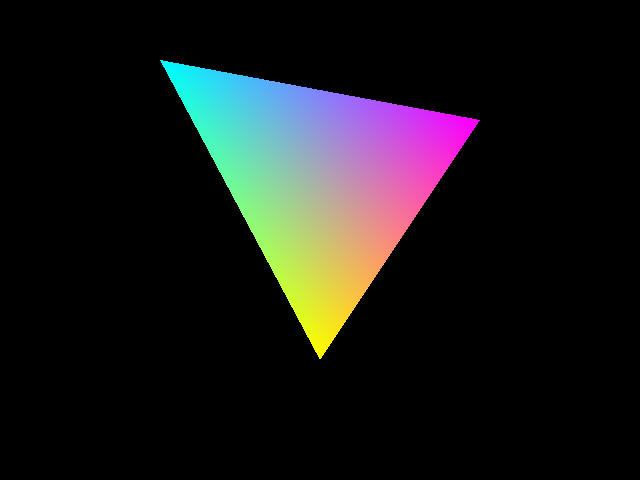

In [1]:
from wgpu.gui.auto import WgpuCanvas
from triangle import setup_drawing_sync

canvas = WgpuCanvas(size=(640, 480))

draw_frame = setup_drawing_sync(canvas)
canvas.request_draw(draw_frame)

canvas

## Cube example

An interactive example this time.

RFBOutputContext()

JupyterWgpuCanvas(css_height='480px', css_width='640px')
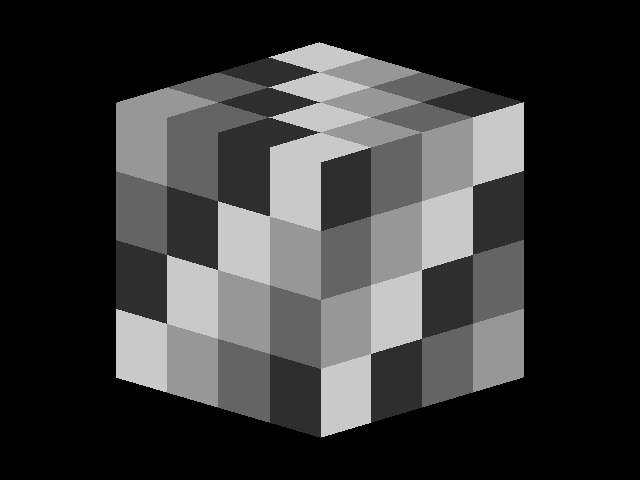

In [2]:
from cube import setup_drawing_sync

canvas = WgpuCanvas(size=(640, 480), max_fps= 10, update_mode='continuous')

draw_frame = setup_drawing_sync(canvas)
canvas.request_draw(draw_frame)

canvas

## Events

In [3]:
import time
import ipywidgets

out = ipywidgets.Textarea(rows=10)
out

Textarea(value='', rows=10)

In [4]:
@canvas.add_event_handler("*")
def process_event(event):
    if event["event_type"] not in ["pointer_move", "before_draw", "animate"]:
        out.value = str(event)

    if event["event_type"] == "key_down":
        if event["key"] == "Escape":
            canvas.close()
        elif event["key"] == " ":
            etime = time.time() + 2
            i = 0
            while time.time() < etime:
                i += 1
                canvas.force_draw()
            print(f"force-drawed {i} frames in 2s.")
    elif event["event_type"] == "close":
        # Should see this exactly once, either when pressing escape, or
        # when pressing the window close button.
        print("Close detected!")
        assert canvas.is_closed()